# Module 2 RNN and LSTM

## Implement RNN in Numpy

In [0]:
import numpy as np
timesteps = 10
input_features = 3
output_features = 5
inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,)) #Initialize state

In [0]:
inputs

array([[0.25965202, 0.96838212, 0.99352315],
       [0.08179832, 0.45151986, 0.74517443],
       [0.55617344, 0.67944701, 0.07511405],
       [0.03352414, 0.63367261, 0.62324128],
       [0.58733546, 0.37569738, 0.25206699],
       [0.51598373, 0.27723854, 0.48283478],
       [0.99995683, 0.75593677, 0.79672276],
       [0.76421218, 0.20152479, 0.36791393],
       [0.48453377, 0.95174436, 0.81113652],
       [0.53571641, 0.30413294, 0.64919089]])

In [0]:
state_t

array([0., 0., 0., 0., 0.])

In [0]:
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))
successive_outputs = []

In [0]:
W

array([[0.89480117, 0.5460555 , 0.70989505],
       [0.38638393, 0.52873766, 0.06525515],
       [0.41151512, 0.3170081 , 0.40538045],
       [0.45701786, 0.68124969, 0.69966009],
       [0.67637899, 0.81441483, 0.0376568 ]])

In [0]:
U

array([[0.20516508, 0.54663407, 0.15590958, 0.4118958 , 0.25158748],
       [0.44012807, 0.44980375, 0.30288506, 0.31605081, 0.46309184],
       [0.57886896, 0.15658488, 0.92805497, 0.77724134, 0.69652141],
       [0.80635747, 0.59025278, 0.85656598, 0.21495678, 0.99234196],
       [0.84705217, 0.57796309, 0.42656809, 0.88737154, 0.63410645]])

In [0]:
b

array([0.991339  , 0.30083004, 0.30416789, 0.65455682, 0.31874503])

In [0]:
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t
    print(state_t)

[0.98544302 0.75220229 0.80783257 0.97204201 0.86689476]
[0.99666825 0.98180143 0.99844804 0.99976321 0.99899194]
[0.99807809 0.993212   0.99919555 0.99988197 0.99980167]
[0.9976687  0.99020747 0.99919001 0.99990767 0.99959143]
[0.9980501  0.99116586 0.99918157 0.99986643 0.99969629]
[0.99822425 0.98996684 0.9992344  0.99988218 0.99961481]
[0.99971588 0.99599036 0.99970566 0.99997455 0.99991026]
[0.99855271 0.99094572 0.99928471 0.99987891 0.99968873]
[0.99943541 0.99516259 0.99960763 0.99996947 0.99986937]
[0.99869221 0.99064847 0.99935548 0.99991232 0.99964822]


In [0]:
successive_outputs

[array([0.98544302, 0.75220229, 0.80783257, 0.97204201, 0.86689476]),
 array([0.99666825, 0.98180143, 0.99844804, 0.99976321, 0.99899194]),
 array([0.99807809, 0.993212  , 0.99919555, 0.99988197, 0.99980167]),
 array([0.9976687 , 0.99020747, 0.99919001, 0.99990767, 0.99959143]),
 array([0.9980501 , 0.99116586, 0.99918157, 0.99986643, 0.99969629]),
 array([0.99822425, 0.98996684, 0.9992344 , 0.99988218, 0.99961481]),
 array([0.99971588, 0.99599036, 0.99970566, 0.99997455, 0.99991026]),
 array([0.99855271, 0.99094572, 0.99928471, 0.99987891, 0.99968873]),
 array([0.99943541, 0.99516259, 0.99960763, 0.99996947, 0.99986937]),
 array([0.99869221, 0.99064847, 0.99935548, 0.99991232, 0.99964822])]

## Simple RNN

In [0]:
from keras.datasets import imdb
from keras import preprocessing

# Number of words to consider as features
MAX_WORDS = 20000

# Cut texts after this number of words 
MAX_LEN = 80

# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=MAX_WORDS)

Using TensorFlow backend.


17465344/17464789 [==============================] - 0s 0us/step


In [0]:
x_train = preprocessing.sequence.pad_sequences(x_train,maxlen=MAX_LEN,padding='pre', truncating='pre')
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=MAX_LEN)

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

model = Sequential()
model.add(Embedding(MAX_WORDS, 50))
model.add(SimpleRNN(32, activation="tanh"))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 50)          1000000   
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                2656      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,002,689
Trainable params: 1,002,689
Non-trainable params: 0
_________________________________________________________________


In [0]:
50*32 + 32*32 + 32

2656

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=8,validation_data=(x_test,y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/8
25000/25000 [==============================] - 22s 889us/step - loss: 0.4988 - acc: 0.7467 - val_loss: 0.4012 - val_acc: 0.8204
Epoch 2/8
25000/25000 [==============================] - 21s 855us/step - loss: 0.2778 - acc: 0.8890 - val_loss: 0.4327 - val_acc: 0.8037
Epoch 3/8
25000/25000 [==============================] - 21s 852us/step - loss: 0.1464 - acc: 0.9457 - val_loss: 0.5480 - val_acc: 0.8185
Epoch 4/8
25000/25000 [==============================] - 21s 833us/step - loss: 0.0589 - acc: 0.9801 - val_loss: 0.6069 - val_acc: 0.8008
Epoch 5/8
25000/25000 [==============================] - 21s 832us/step - loss: 0.0261 - acc: 0.9923 - val_loss: 0.7893 - val_acc: 0.8044
Epoch 6/8
25000/25000 [==============================] - 20s 816us/step - loss: 0.0226 - acc: 0.9928 - val_loss: 0.8571 - val_acc: 0.7886
Epoch 7/8
25000/25000 [==============================] - 20s 817us/step - loss: 0.0277 - acc: 0.9911 - val_loss: 0.9249 - 

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [0]:
epochs = range(1,len(acc)+1)

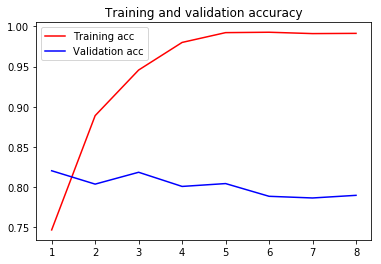

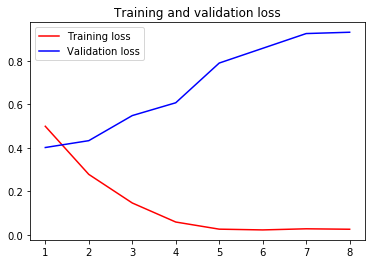

In [0]:
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## LSTM 

In [0]:
from keras.layers import Dense, LSTM,GRU

model = Sequential()
model.add(Embedding(MAX_WORDS, 50))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 50)          1000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                10624     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,010,657
Trainable params: 1,010,657
Non-trainable params: 0
_________________________________________________________________


In [0]:
(50*32 + 32*32 + 32) * 4

10624

In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [0]:
history = model.fit(x_train, y_train, epochs=8,validation_data=(x_test,y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/8
25000/25000 [==============================] - 51s 2ms/step - loss: 0.4393 - acc: 0.7936 - val_loss: 0.3694 - val_acc: 0.8383
Epoch 2/8
25000/25000 [==============================] - 51s 2ms/step - loss: 0.3011 - acc: 0.8757 - val_loss: 0.3633 - val_acc: 0.8401
Epoch 3/8
25000/25000 [==============================] - 51s 2ms/step - loss: 0.2610 - acc: 0.8956 - val_loss: 0.3728 - val_acc: 0.8366
Epoch 4/8
25000/25000 [==============================] - 51s 2ms/step - loss: 0.2383 - acc: 0.9046 - val_loss: 0.3985 - val_acc: 0.8257
Epoch 5/8
25000/25000 [==============================] - 52s 2ms/step - loss: 0.2164 - acc: 0.9161 - val_loss: 0.3872 - val_acc: 0.8329
Epoch 6/8
25000/25000 [==============================] - 51s 2ms/step - loss: 0.1978 - acc: 0.9231 - val_loss: 0.4753 - val_acc: 0.8260
Epoch 7/8
25000/25000 [==============================] - 51s 2ms/step - loss: 0.1805 - acc: 0.9323 - val_loss: 0.3936 - val_acc: 0.844

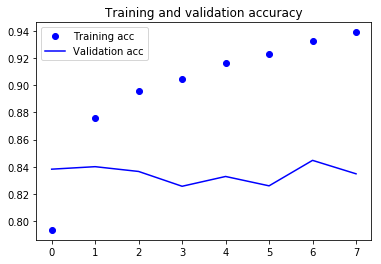

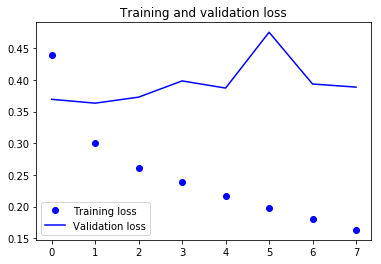

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Ex: GRU

In [0]:
from keras.layers import GRU

model = Sequential()
model.add(Embedding(MAX_WORDS, 50))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 50)          1000000   
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                7968      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,008,001
Trainable params: 1,008,001
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [0]:
history = model.fit(x_train, y_train, epochs=8,validation_data=(x_test,y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/8
25000/25000 [==============================] - 42s 2ms/step - loss: 0.4363 - acc: 0.7912 - val_loss: 0.3784 - val_acc: 0.8343
Epoch 2/8
25000/25000 [==============================] - 42s 2ms/step - loss: 0.3016 - acc: 0.8765 - val_loss: 0.4132 - val_acc: 0.8128
Epoch 3/8
25000/25000 [==============================] - 41s 2ms/step - loss: 0.2637 - acc: 0.8950 - val_loss: 0.3570 - val_acc: 0.8408
Epoch 4/8
25000/25000 [==============================] - 42s 2ms/step - loss: 0.2344 - acc: 0.9076 - val_loss: 0.3462 - val_acc: 0.8476
Epoch 5/8
25000/25000 [==============================] - 41s 2ms/step - loss: 0.2120 - acc: 0.9184 - val_loss: 0.4948 - val_acc: 0.8234
Epoch 6/8
25000/25000 [==============================] - 41s 2ms/step - loss: 0.1913 - acc: 0.9261 - val_loss: 0.3690 - val_acc: 0.8497
Epoch 7/8
25000/25000 [==============================] - 41s 2ms/step - loss: 0.1695 - acc: 0.9359 - val_loss: 0.3706 - val_acc: 0.844

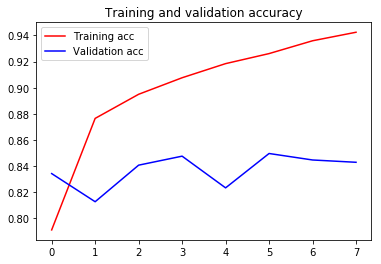

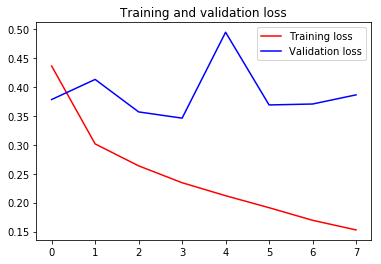

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Dropout

In [0]:
from keras.layers import GRU

model = Sequential()
model.add(Embedding(MAX_WORDS, 50))
model.add(GRU(32,dropout=0.2,recurrent_dropout=0.2))
# model.add(GRU(32,dropout=0.5,recurrent_dropout=0.5))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 50)          1000000   
_________________________________________________________________
gru_2 (GRU)                  (None, 32)                7968      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,008,001
Trainable params: 1,008,001
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [0]:
history = model.fit(x_train, y_train, epochs=10,validation_data=(x_test,y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 52s 2ms/step - loss: 0.5113 - acc: 0.7501 - val_loss: 0.4258 - val_acc: 0.8058
Epoch 2/10
25000/25000 [==============================] - 51s 2ms/step - loss: 0.3729 - acc: 0.8434 - val_loss: 0.3944 - val_acc: 0.8222
Epoch 3/10
25000/25000 [==============================] - 50s 2ms/step - loss: 0.3176 - acc: 0.8696 - val_loss: 0.3527 - val_acc: 0.8486
Epoch 4/10
25000/25000 [==============================] - 50s 2ms/step - loss: 0.2841 - acc: 0.8864 - val_loss: 0.3512 - val_acc: 0.8490
Epoch 5/10
25000/25000 [==============================] - 51s 2ms/step - loss: 0.2609 - acc: 0.8968 - val_loss: 0.3493 - val_acc: 0.8532
Epoch 6/10
25000/25000 [==============================] - 51s 2ms/step - loss: 0.2417 - acc: 0.9056 - val_loss: 0.3499 - val_acc: 0.8536
Epoch 7/10
25000/25000 [==============================] - 50s 2ms/step - loss: 0.2223 - acc: 0.9129 - val_loss: 0.3450 - val_acc

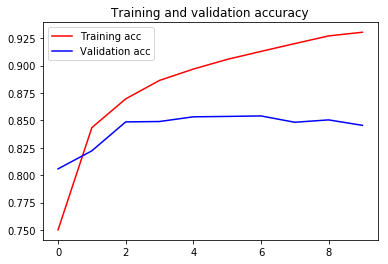

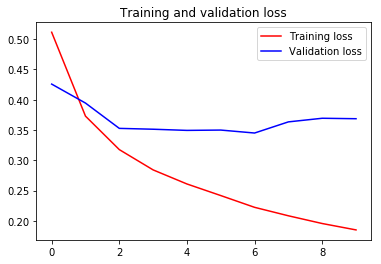

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Stacked RNN

In [0]:
from keras.layers import Dense, LSTM,GRU, Embedding
from keras.models import Sequential

model = Sequential()
model.add(Embedding(MAX_WORDS, 50))
model.add(GRU(32, return_sequences=True))
model.add(GRU(32, return_sequences=True))
model.add(GRU(32, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 50)          1000000   
_________________________________________________________________
gru_3 (GRU)                  (None, None, 32)          7968      
_________________________________________________________________
gru_4 (GRU)                  (None, None, 32)          6240      
_________________________________________________________________
gru_5 (GRU)                  (None, None, 32)          6240      
_________________________________________________________________
gru_6 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 1,026,721
Trainable params: 1,026,721
Non-trainable params: 0
____________________________________________

In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=8,validation_data=(x_test,y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/8
25000/25000 [==============================] - 133s 5ms/step - loss: 0.4412 - acc: 0.7884 - val_loss: 0.3882 - val_acc: 0.8283
Epoch 2/8
25000/25000 [==============================] - 131s 5ms/step - loss: 0.3004 - acc: 0.8772 - val_loss: 0.4420 - val_acc: 0.8332
Epoch 3/8
25000/25000 [==============================] - 131s 5ms/step - loss: 0.2518 - acc: 0.8986 - val_loss: 0.3473 - val_acc: 0.8470
Epoch 4/8
25000/25000 [==============================] - 132s 5ms/step - loss: 0.2201 - acc: 0.9130 - val_loss: 0.3581 - val_acc: 0.8376
Epoch 5/8
25000/25000 [==============================] - 133s 5ms/step - loss: 0.1957 - acc: 0.9243 - val_loss: 0.3821 - val_acc: 0.8278
Epoch 6/8
25000/25000 [==============================] - 132s 5ms/step - loss: 0.1718 - acc: 0.9337 - val_loss: 0.4001 - val_acc: 0.8387
Epoch 7/8
25000/25000 [==============================] - 134s 5ms/step - loss: 0.1498 - acc: 0.9452 - val_loss: 0.4337 - val_acc

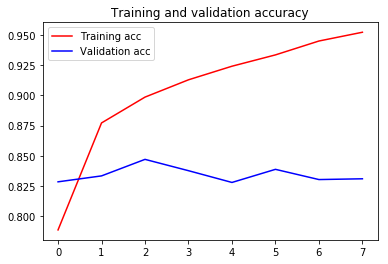

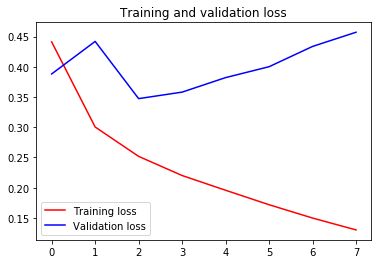

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## BiDirectional RNN

In [0]:
from keras.layers import GRU
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense
from keras.optimizers import RMSprop

model = Sequential()
model.add(Embedding(MAX_WORDS, 50))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10,validation_data=(x_test,y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 87s 3ms/step - loss: 0.4363 - acc: 0.7900 - val_loss: 0.3687 - val_acc: 0.8412
Epoch 2/10
25000/25000 [==============================] - 84s 3ms/step - loss: 0.2974 - acc: 0.8767 - val_loss: 0.3947 - val_acc: 0.8381
Epoch 3/10
25000/25000 [==============================] - 83s 3ms/step - loss: 0.2576 - acc: 0.8963 - val_loss: 0.3489 - val_acc: 0.8511
Epoch 4/10
25000/25000 [==============================] - 83s 3ms/step - loss: 0.2297 - acc: 0.9095 - val_loss: 0.4174 - val_acc: 0.8274
Epoch 5/10
25000/25000 [==============================] - 83s 3ms/step - loss: 0.2100 - acc: 0.9180 - val_loss: 0.3785 - val_acc: 0.8441
Epoch 6/10
25000/25000 [==============================] - 83s 3ms/step - loss: 0.1869 - acc: 0.9275 - val_loss: 0.3884 - val_acc: 0.8306
Epoch 7/10
25000/25000 [==============================] - 82s 3ms/step - loss: 0.1637 - acc: 0.9379 - val_loss: 0.4283 - val_acc

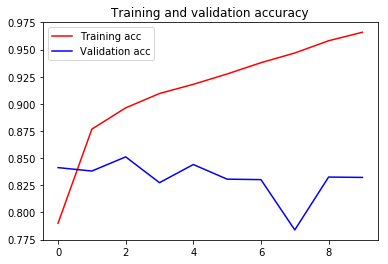

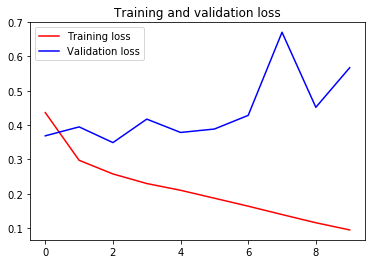

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()